<a href="https://colab.research.google.com/github/krishnaaxo/AutoMobileCarPricePrediction/blob/main/AutoMobileCarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [530]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

sns.set(color_codes=True)

In [531]:
auto = pd.read_csv('/content/Automobile (1).csv')

In [532]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


EDA

In [533]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

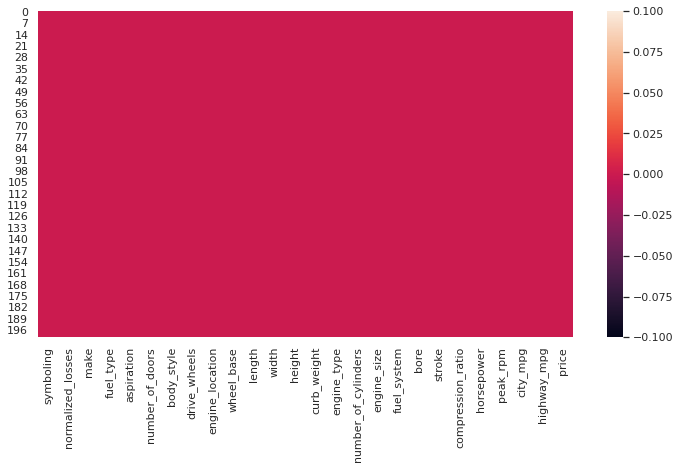

In [534]:
plt.figure(figsize=(12, 6))
sns.heatmap(auto.isnull())
plt.show()

In [535]:
auto.isnull().count()

symboling              201
normalized_losses      201
make                   201
fuel_type              201
aspiration             201
number_of_doors        201
body_style             201
drive_wheels           201
engine_location        201
wheel_base             201
length                 201
width                  201
height                 201
curb_weight            201
engine_type            201
number_of_cylinders    201
engine_size            201
fuel_system            201
bore                   201
stroke                 201
compression_ratio      201
horsepower             201
peak_rpm               201
city_mpg               201
highway_mpg            201
price                  201
dtype: int64

In [536]:
auto.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [537]:
train_corr = auto.select_dtypes(include=[np.number])

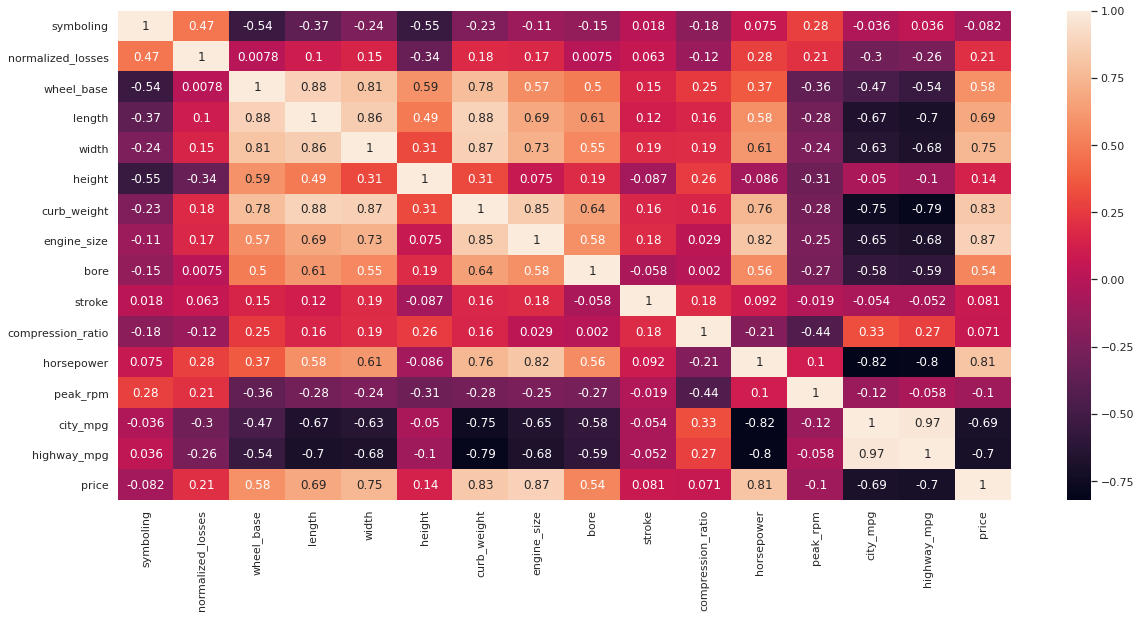

In [538]:
corr = train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

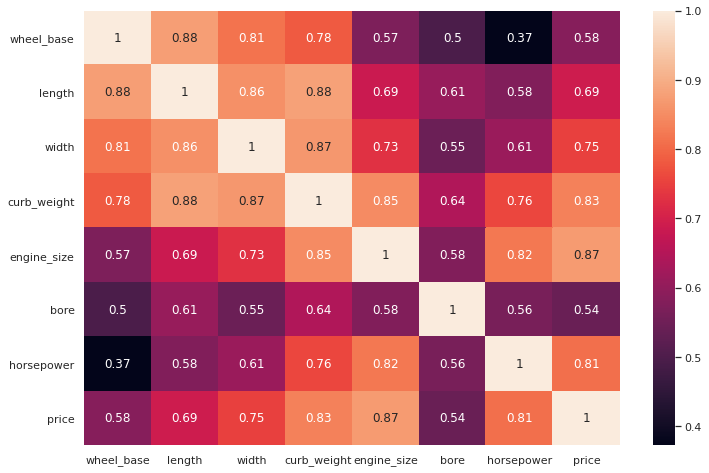

In [539]:
top_feature = corr.index[abs(corr['price']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = auto[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

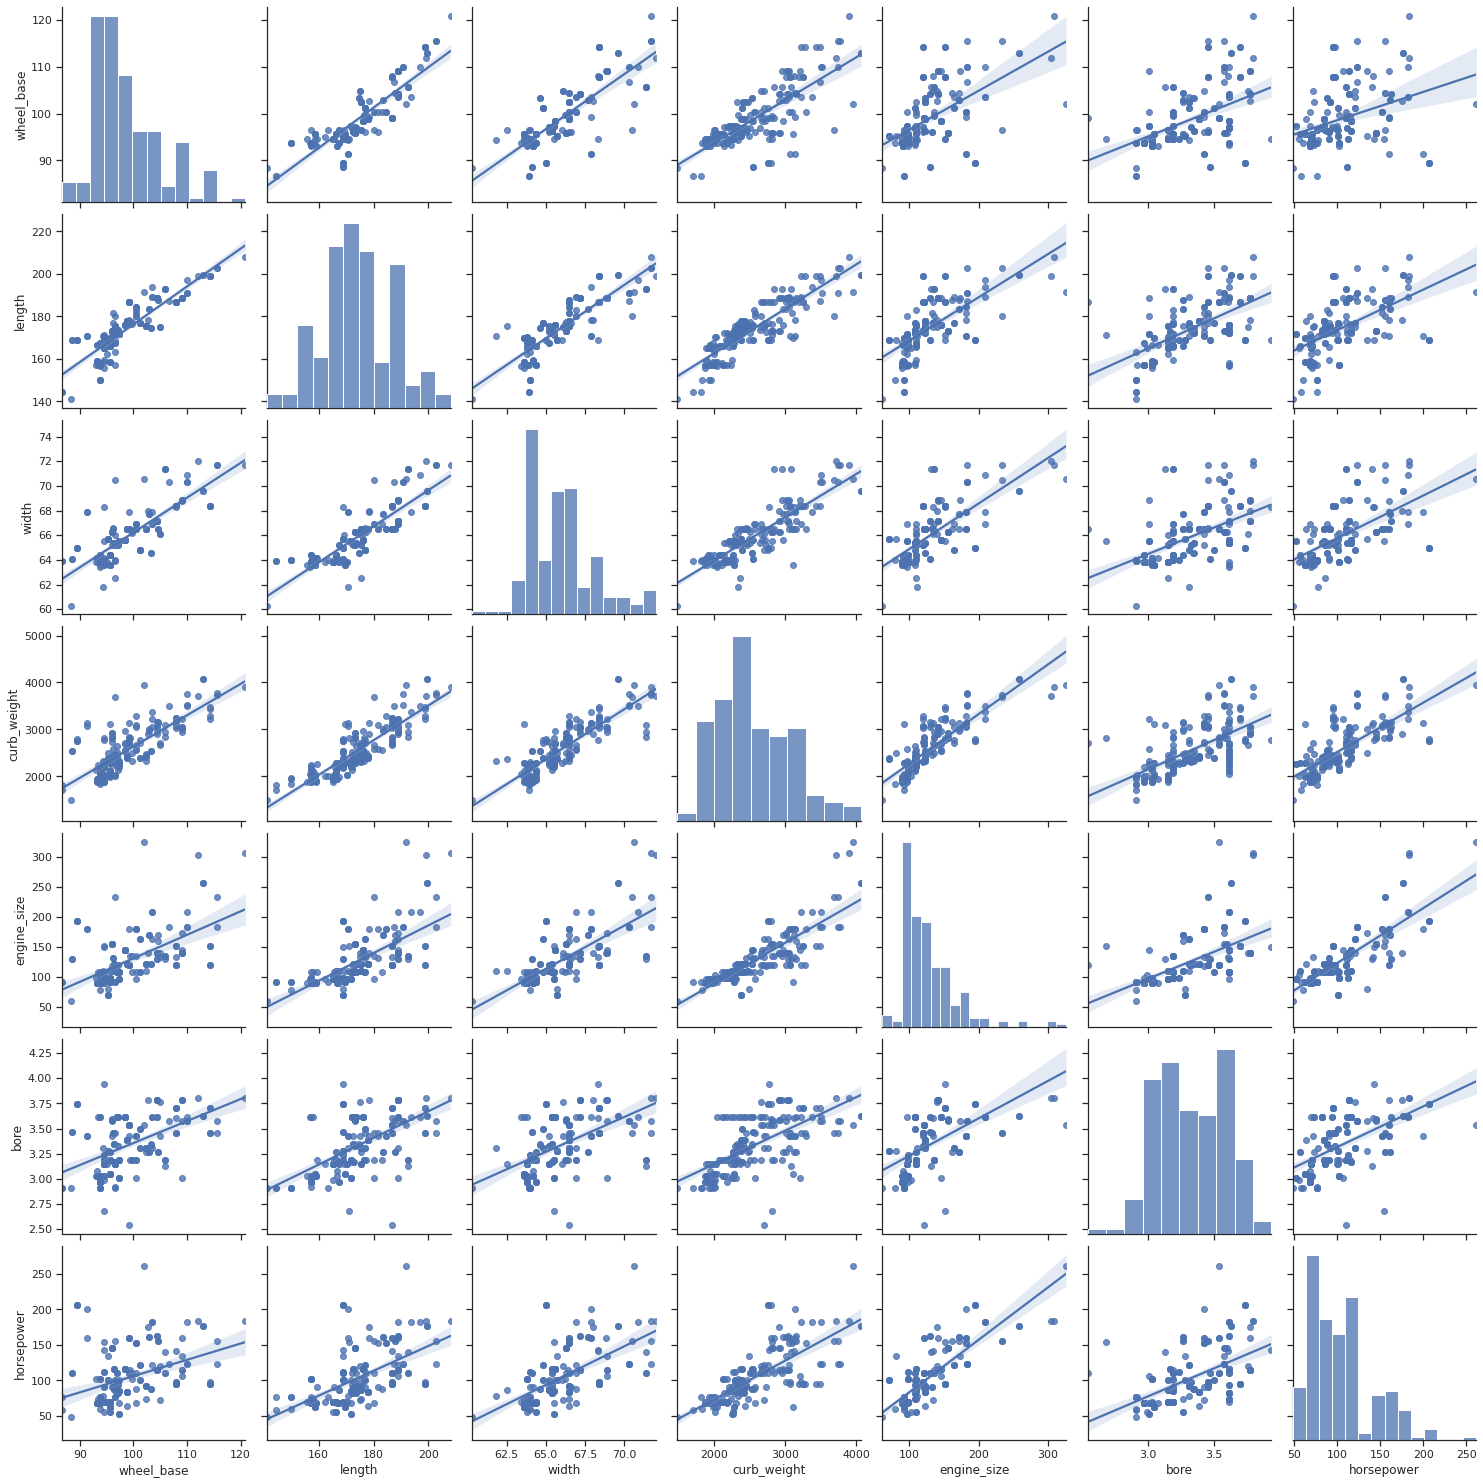

In [540]:
col = ['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'bore', 'horsepower']
sns.set(style='ticks')
sns.pairplot(auto[col], height=3, kind='reg')

<Figure size 432x288 with 0 Axes>

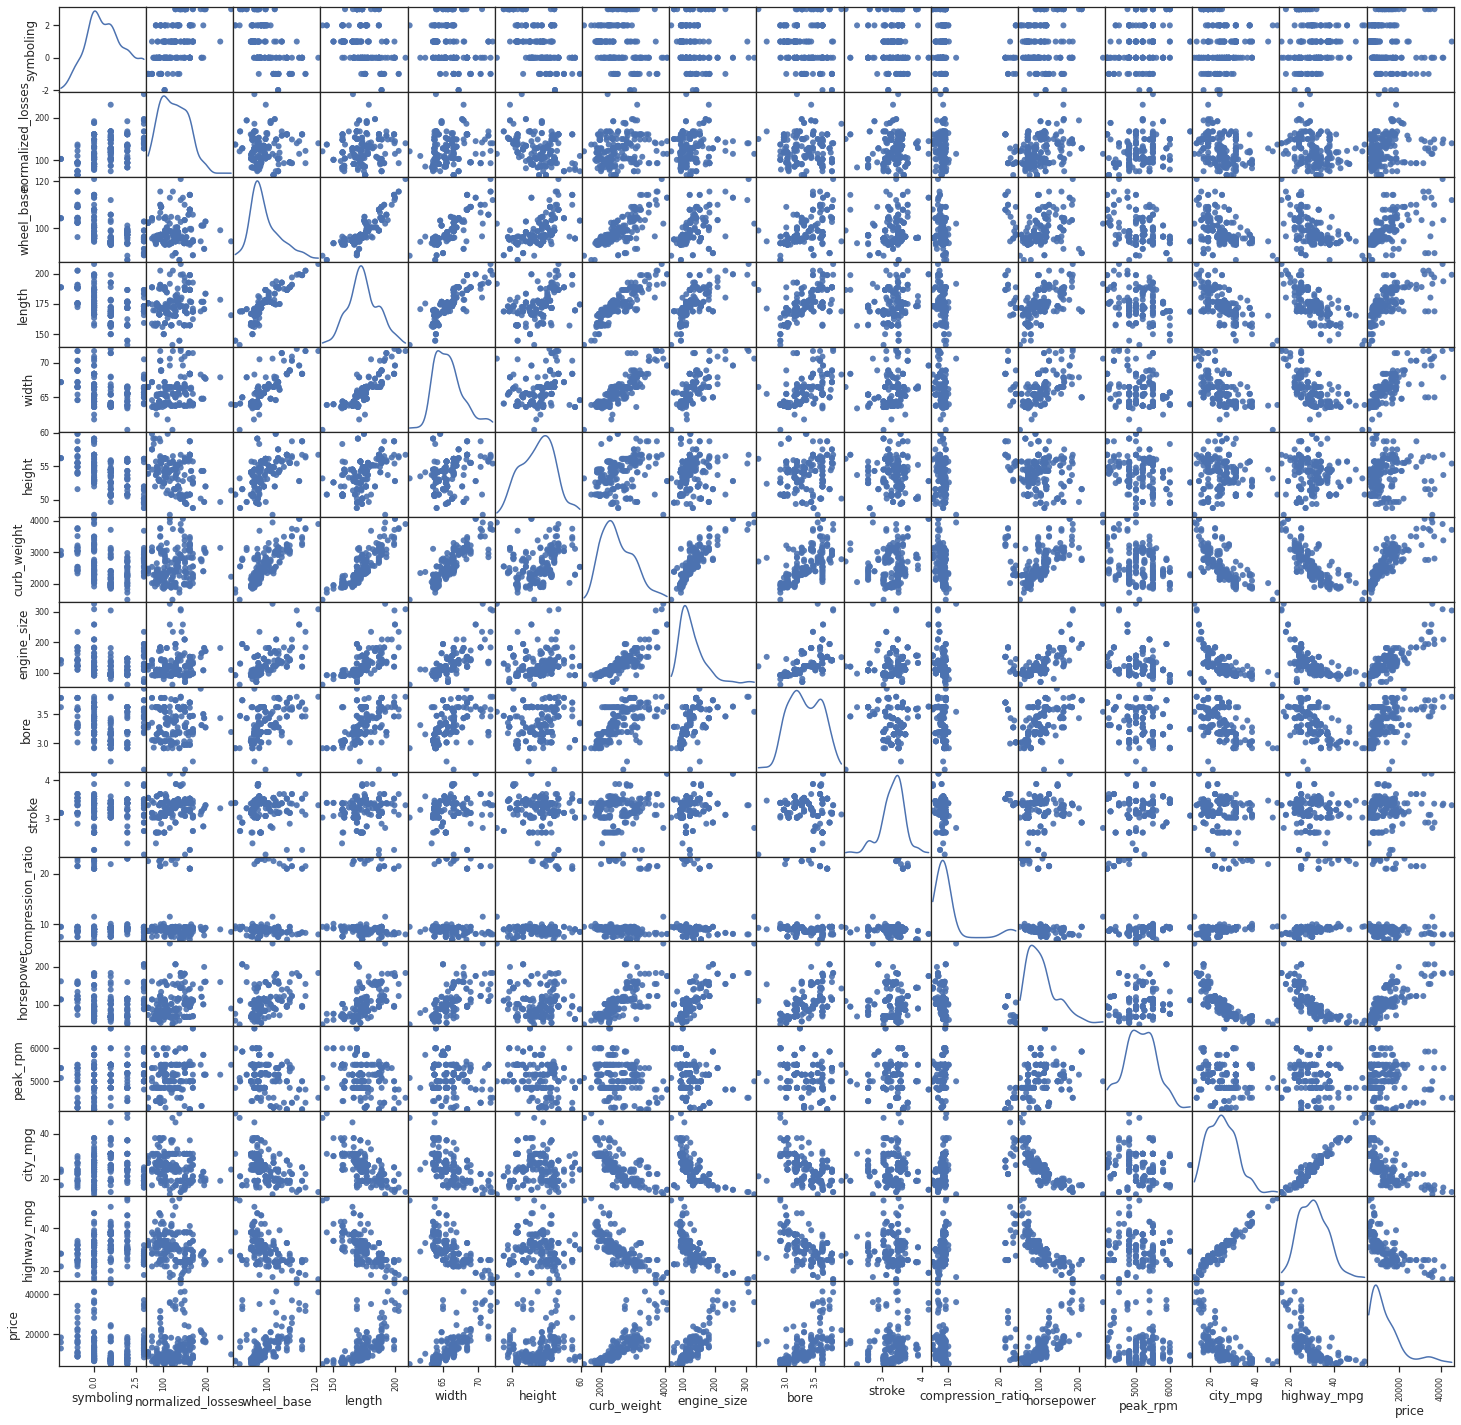

In [541]:
from pandas.plotting import scatter_matrix
fig = plt.figure()
scatter_matrix(auto,figsize =(25,25),alpha=0.9,diagonal="kde",marker="o");

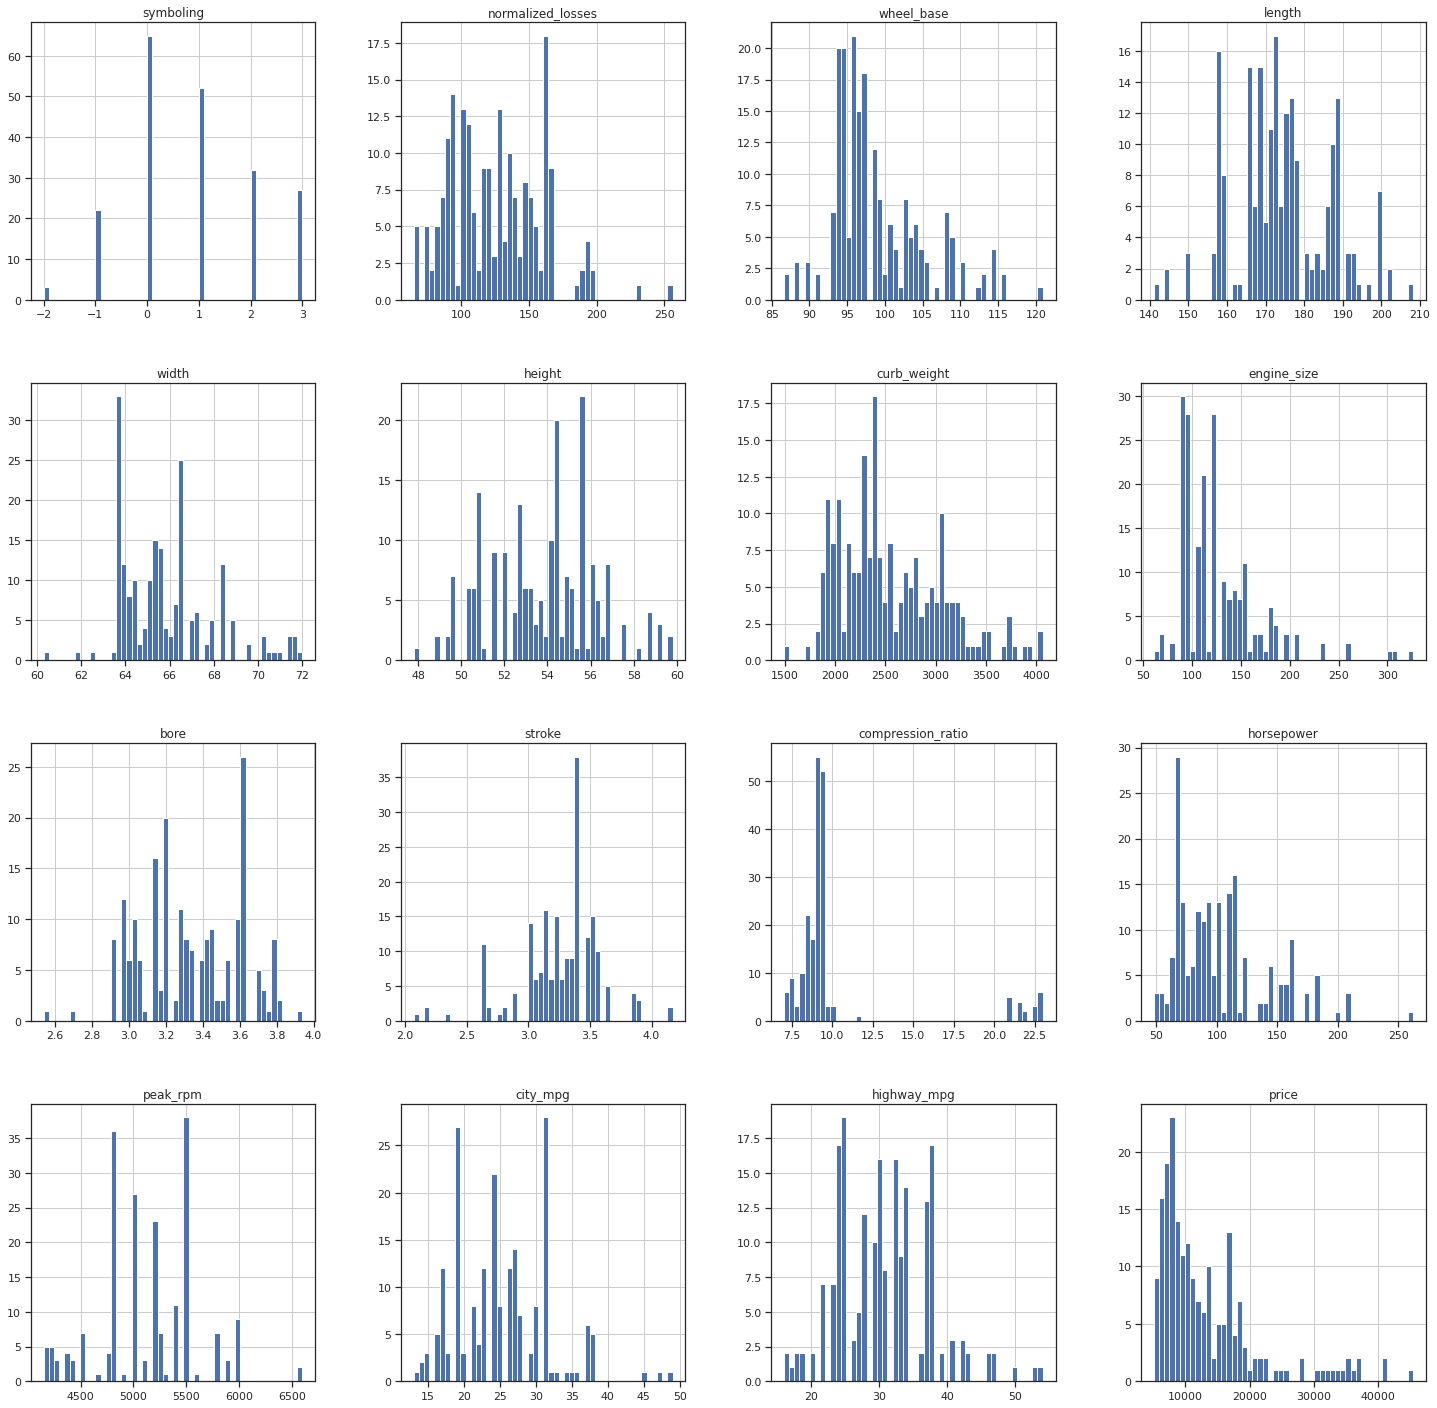

In [542]:
auto.hist(figsize=(25,25),bins=50);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


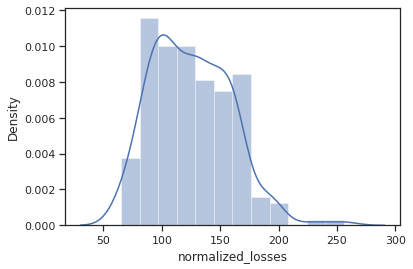

In [543]:
sns.distplot(auto['normalized_losses'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


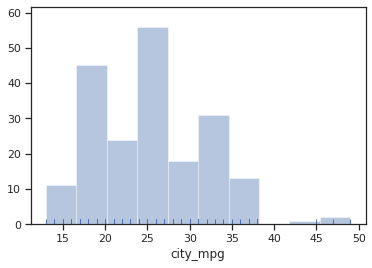

In [544]:
sns.distplot(auto['city_mpg'], kde=False, rug=True);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


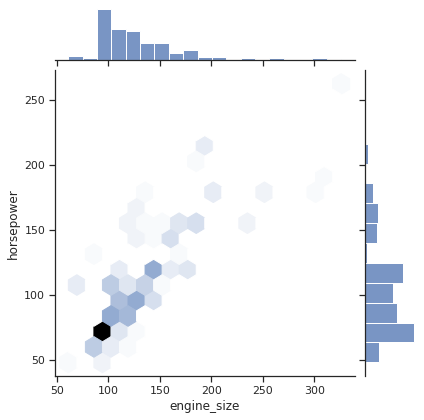

In [545]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="hex")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


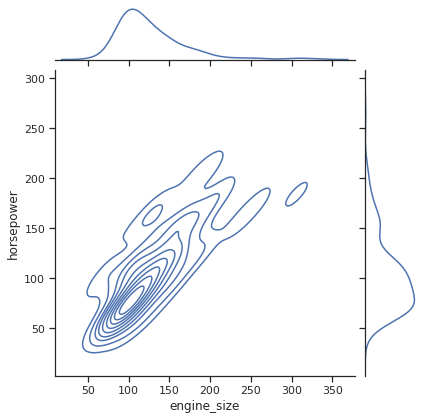

In [546]:
sns.jointplot(auto['engine_size'], auto['horsepower'], kind="kde")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


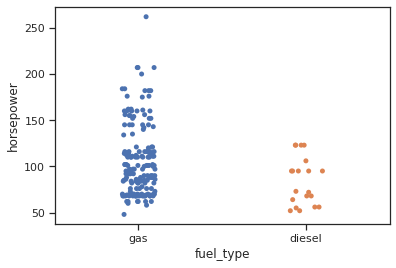

In [547]:
sns.stripplot(auto['fuel_type'], auto['horsepower'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


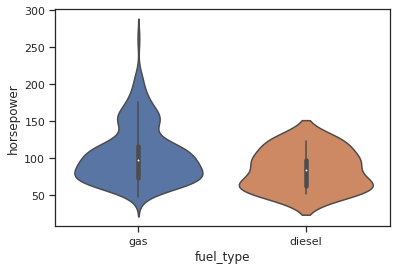

In [548]:
sns.violinplot(auto['fuel_type'], auto['horsepower'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


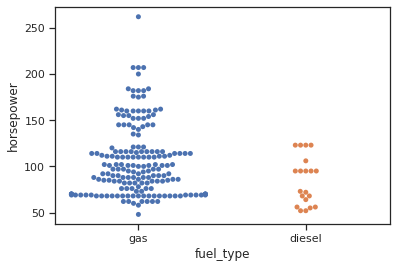

In [549]:
sns.swarmplot(auto['fuel_type'], auto['horsepower'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


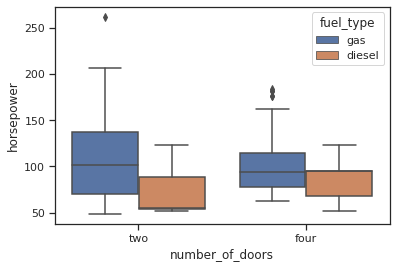

In [550]:
sns.boxplot(auto['number_of_doors'], auto['horsepower'], hue=auto['fuel_type'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


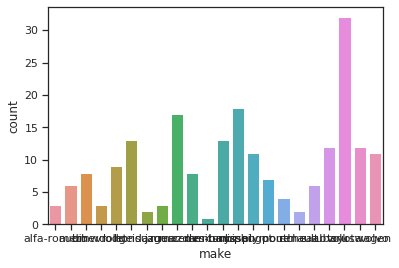

In [551]:
sns.countplot(auto['make'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


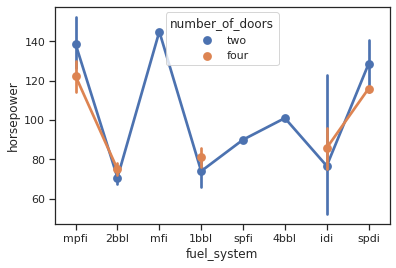

In [552]:
sns.pointplot(auto['fuel_system'], auto['horsepower'], hue=auto['number_of_doors'])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


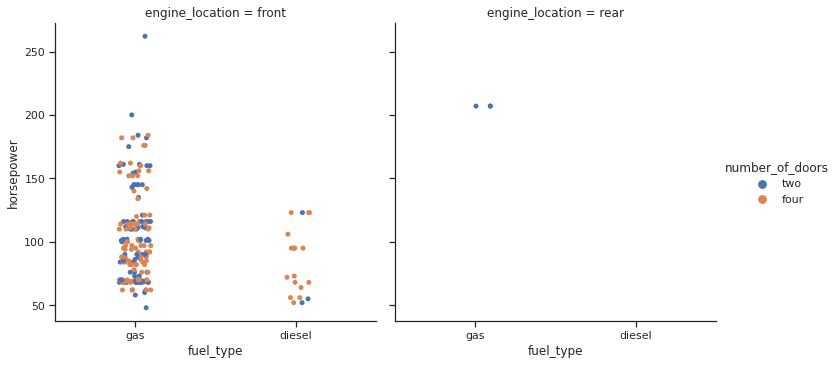

In [553]:
sns.factorplot(x="fuel_type", 
               y="horsepower", 
               hue="number_of_doors", 
               col="engine_location", 
               data=auto, 
               kind="strip")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


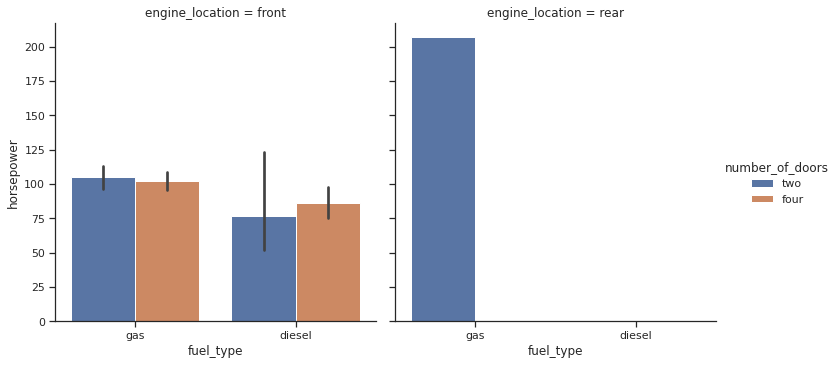

In [554]:
sns.factorplot(x="fuel_type", 
               y="horsepower", 
               hue="number_of_doors", 
               col="engine_location", 
               data=auto, 
               kind="bar")

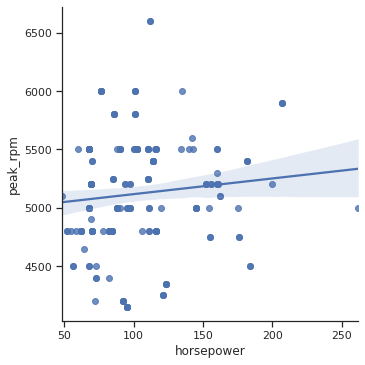

In [555]:
sns.lmplot(x="horsepower", y="peak_rpm", data=auto)

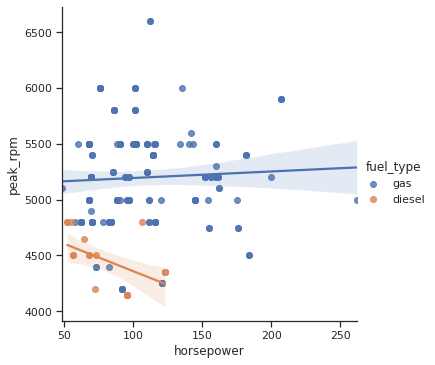

In [556]:
sns.lmplot(x="horsepower", y="peak_rpm",hue="fuel_type", data=auto)

In [557]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [558]:
auto.duplicated().sum()

0

In [559]:
X = auto.iloc[:, :-1].values
y = auto.iloc[:, -1].values
y = y.reshape(len(y),1)

In [560]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2,3,4,5,6,7,8,14,15,17])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [561]:
X

array([[1.0, 0.0, 0.0, ..., 5000, 21, 27],
       [1.0, 0.0, 0.0, ..., 5000, 21, 27],
       [1.0, 0.0, 0.0, ..., 5000, 19, 26],
       ...,
       [0.0, 0.0, 0.0, ..., 5500, 18, 23],
       [0.0, 0.0, 0.0, ..., 4800, 26, 27],
       [0.0, 0.0, 0.0, ..., 5400, 19, 25]], dtype=object)

In [562]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [563]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [564]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8949.   9549. ]
 [ 6229.   6229. ]
 [ 8495.  10245. ]
 [ 7150.5  7295. ]
 [11549.   9989. ]
 [ 6488.   6338. ]
 [12764.  12964. ]
 [ 9959.   8499. ]
 [17669.  17450. ]
 [ 5572.   6295. ]
 [ 9233.   8948. ]
 [ 6938.   7295. ]
 [ 9639.   8449. ]
 [21105.  20970. ]
 [15040.  11694. ]
 [11900.  16630. ]
 [ 5572.   6479. ]
 [13200.  22470. ]
 [ 7299.   7499. ]
 [ 7975.   8195. ]
 [10295.   8845. ]
 [ 9258.   8058. ]
 [30760.  36880. ]
 [16695.  15580. ]
 [ 5348.   5399. ]
 [35550.  32250. ]
 [11549.  11199. ]
 [ 6095.   5195. ]
 [ 8495.  10898. ]
 [ 7738.   7999. ]
 [13415.  12940. ]
 [ 8921.   8921. ]
 [10698.  12945. ]
 [ 6695.   6849. ]
 [16558.  15998. ]
 [18950.  18150. ]
 [ 9279.   9279. ]
 [ 7975.   7775. ]
 [14399.  13499. ]
 [25552.  31600. ]
 [11850.  13845. ]]


In [565]:
from sklearn.metrics import r2_score
rr1=r2_score(y_test, y_pred)
rr1

0.890343189921153

In [566]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train, y_train)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [567]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8837.7   9549.  ]
 [ 6416.3   6229.  ]
 [ 8945.62 10245.  ]
 [ 7060.88  7295.  ]
 [11264.9   9989.  ]
 [ 6600.95  6338.  ]
 [13435.1  12964.  ]
 [ 9128.97  8499.  ]
 [16272.4  17450.  ]
 [ 5822.85  6295.  ]
 [10195.8   8948.  ]
 [ 7127.92  7295.  ]
 [10969.1   8449.  ]
 [19297.9  20970.  ]
 [12031.58 11694.  ]
 [12512.   16630.  ]
 [ 5864.9   6479.  ]
 [18032.4  22470.  ]
 [ 7130.55  7499.  ]
 [ 8206.3   8195.  ]
 [ 9637.85  8845.  ]
 [ 8239.75  8058.  ]
 [38046.75 36880.  ]
 [14216.65 15580.  ]
 [ 5694.85  5399.  ]
 [37824.3  32250.  ]
 [12577.15 11199.  ]
 [ 6057.1   5195.  ]
 [10396.75 10898.  ]
 [ 7425.05  7999.  ]
 [15360.   12940.  ]
 [ 9745.7   8921.  ]
 [10009.55 12945.  ]
 [ 6689.35  6849.  ]
 [16757.35 15998.  ]
 [17368.   18150.  ]
 [ 9020.85  9279.  ]
 [ 8117.05  7775.  ]
 [15667.2  13499.  ]
 [29014.75 31600.  ]
 [11923.55 13845.  ]]


In [568]:
from sklearn.metrics import r2_score
rr2=r2_score(y_test, y_pred)
rr2

0.94288037462957

In [569]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results


# Evaluating the Model Performance


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [570]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[11174.78  9549.  ]
 [ 5883.44  6229.  ]
 [11211.95 10245.  ]
 [ 5976.77  7295.  ]
 [11245.67  9989.  ]
 [ 6659.3   6338.  ]
 [14840.05 12964.  ]
 [ 8141.3   8499.  ]
 [18461.86 17450.  ]
 [ 5781.73  6295.  ]
 [ 8430.61  8948.  ]
 [ 6682.34  7295.  ]
 [12927.97  8449.  ]
 [22779.06 20970.  ]
 [11219.98 11694.  ]
 [11909.28 16630.  ]
 [ 1958.66  6479.  ]
 [22664.8  22470.  ]
 [ 6071.2   7499.  ]
 [ 8813.17  8195.  ]
 [ 8560.89  8845.  ]
 [ 7336.69  8058.  ]
 [35910.61 36880.  ]
 [12966.45 15580.  ]
 [ 3989.56  5399.  ]
 [35237.77 32250.  ]
 [13720.97 11199.  ]
 [ 6038.17  5195.  ]
 [ 8854.81 10898.  ]
 [ 6659.97  7999.  ]
 [15918.84 12940.  ]
 [ 7754.95  8921.  ]
 [ 7978.17 12945.  ]
 [ 5882.94  6849.  ]
 [16504.36 15998.  ]
 [14177.2  18150.  ]
 [ 9944.2   9279.  ]
 [ 6906.95  7775.  ]
 [15359.31 13499.  ]
 [28942.34 31600.  ]
 [11454.31 13845.  ]]


In [571]:
from sklearn.metrics import r2_score
rr3=r2_score(y_test, y_pred)
rr3

0.9157477238540844

In [572]:
from xgboost import XGBRegressor
regressor= XGBRegressor()
regressor.fit(X_train, y_train)



[20:42:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [573]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8866.58  9549.  ]
 [ 6374.87  6229.  ]
 [ 9343.26 10245.  ]
 [ 6585.18  7295.  ]
 [11470.84  9989.  ]
 [ 6596.98  6338.  ]
 [14862.45 12964.  ]
 [ 8316.03  8499.  ]
 [16633.75 17450.  ]
 [ 6298.26  6295.  ]
 [10632.99  8948.  ]
 [ 7164.57  7295.  ]
 [11042.59  8449.  ]
 [21384.7  20970.  ]
 [12087.75 11694.  ]
 [13490.87 16630.  ]
 [ 6244.42  6479.  ]
 [17984.18 22470.  ]
 [ 6845.7   7499.  ]
 [ 8093.96  8195.  ]
 [ 9193.    8845.  ]
 [ 8204.73  8058.  ]
 [38666.71 36880.  ]
 [13879.69 15580.  ]
 [ 6626.2   5399.  ]
 [36980.57 32250.  ]
 [12872.43 11199.  ]
 [ 6531.86  5195.  ]
 [11029.68 10898.  ]
 [ 7212.82  7999.  ]
 [16034.94 12940.  ]
 [ 9295.64  8921.  ]
 [11113.9  12945.  ]
 [ 6563.74  6849.  ]
 [16375.93 15998.  ]
 [16948.53 18150.  ]
 [ 9657.87  9279.  ]
 [ 8006.79  7775.  ]
 [15297.56 13499.  ]
 [28403.87 31600.  ]
 [13140.68 13845.  ]]


In [574]:
from sklearn.metrics import r2_score
rr4=r2_score(y_test, y_pred)
rr4

0.9480097542197015

In [575]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [576]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [577]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8232.28  9549.  ]
 [ 7172.44  6229.  ]
 [10118.99 10245.  ]
 [ 9708.02  7295.  ]
 [12113.51  9989.  ]
 [ 6097.58  6338.  ]
 [13567.52 12964.  ]
 [ 8380.39  8499.  ]
 [16944.08 17450.  ]
 [ 8316.18  6295.  ]
 [10189.6   8948.  ]
 [ 8861.08  7295.  ]
 [11127.09  8449.  ]
 [21958.63 20970.  ]
 [12068.53 11694.  ]
 [13197.11 16630.  ]
 [ 9601.44  6479.  ]
 [18799.81 22470.  ]
 [ 6688.98  7499.  ]
 [ 8955.17  8195.  ]
 [ 9848.73  8845.  ]
 [ 8398.74  8058.  ]
 [29283.39 36880.  ]
 [15150.73 15580.  ]
 [ 7420.29  5399.  ]
 [27217.88 32250.  ]
 [11294.4  11199.  ]
 [ 7025.53  5195.  ]
 [10487.36 10898.  ]
 [ 7582.67  7999.  ]
 [16706.43 12940.  ]
 [10291.07  8921.  ]
 [10626.08 12945.  ]
 [ 6681.94  6849.  ]
 [17009.83 15998.  ]
 [16615.13 18150.  ]
 [10731.66  9279.  ]
 [ 8028.7   7775.  ]
 [14724.75 13499.  ]
 [26630.42 31600.  ]
 [11464.22 13845.  ]]


In [578]:
from sklearn.metrics import r2_score
rr5=r2_score(y_test, y_pred)
rr5

0.8999959039139145

In [579]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [603]:
clas = Sequential()

In [604]:
clas.add(Dense(units= 24, kernel_initializer= 'he_uniform',activation='relu'))


In [605]:
clas.add(Dense(units= 400, kernel_initializer= 'he_uniform',activation='relu'))

In [606]:
clas.add(Dense(units=700, kernel_initializer='he_uniform',activation='relu'))

In [607]:
clas.add(Dense(units=800, kernel_initializer='he_uniform',activation='relu'))

In [608]:
clas.add(Dense(units=700, kernel_initializer='he_uniform',activation='relu'))

In [609]:
clas.add(Dense(units=800, kernel_initializer='he_uniform',activation='relu'))

In [610]:
clas.add(Dense(units = 1))

In [611]:
clas.compile(optimizer = 'adam', loss = 'mean_squared_error' )

In [612]:
model_history=clas.fit(X_train, y_train, batch_size = 60, epochs = 30)

Epoch 1/30
3/3 [==============================] - 0s 19ms/step - loss: 131.6842
Epoch 2/30
3/3 [==============================] - 0s 22ms/step - loss: 7.0756
Epoch 3/30
3/3 [==============================] - 0s 17ms/step - loss: 2.4037
Epoch 4/30
3/3 [==============================] - 0s 16ms/step - loss: 1.8244
Epoch 5/30
3/3 [==============================] - 0s 18ms/step - loss: 1.1648
Epoch 6/30
3/3 [==============================] - 0s 17ms/step - loss: 0.6582
Epoch 7/30
3/3 [==============================] - 0s 18ms/step - loss: 0.5355
Epoch 8/30
3/3 [==============================] - 0s 19ms/step - loss: 0.3728
Epoch 9/30
3/3 [==============================] - 0s 18ms/step - loss: 0.2882
Epoch 10/30
3/3 [==============================] - 0s 17ms/step - loss: 0.1741
Epoch 11/30
3/3 [==============================] - 0s 17ms/step - loss: 0.1937
Epoch 12/30
3/3 [==============================] - 0s 18ms/step - loss: 0.1119
Epoch 13/30
3/3 [==============================] - 0s 18ms/

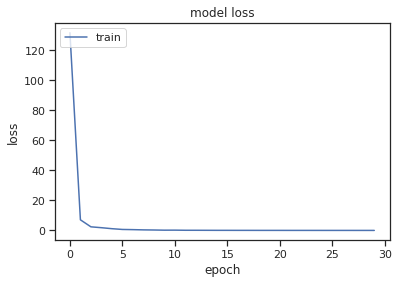

In [613]:
plt.plot(model_history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [614]:
y_pred = sc_y.inverse_transform(clas.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)

In [615]:
from sklearn.metrics import r2_score
rr6=r2_score(y_test, y_pred)
rr6

0.8802928852536256

In [616]:
data = [rr1, rr2, rr3, rr4,rr5,rr6]
index = ['DecisionTreeRegressor', 'Random Forest Regression','Multiple Regression','XGBOOST','SVM','ANN']
pd.DataFrame(data, index=index, columns=['Scores']).sort_values(ascending = False, by=['Scores'])

,Scores
XGBOOST,0.948010
Random Forest Regression,0.942880
Multiple Regression,0.915748
SVM,0.899996
DecisionTreeRegressor,0.890343
ANN,0.880293
